In [2]:
import tensorflow as tf
import numpy as np
import cv2
from matplotlib import pyplot as plt
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam,Adagrad,Adadelta,Adamax,RMSprop

In [3]:
fldr="./UTKFace"

In [4]:
import os
flies=os.listdir(fldr)


In [5]:
ages=[]
genders=[]
images=[]
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    total=fldr+'/'+fle
    print(total)
    image=cv2.imread(total)

    image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image=cv2.resize(image,(48,48))
    images.append(image)

./UTKFace/100_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/100_0_0_20170112215240346.jpg.chip.jpg
./UTKFace/100_1_0_20170110183726390.jpg.chip.jpg
./UTKFace/100_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/100_1_0_20170112213303693.jpg.chip.jpg
./UTKFace/100_1_0_20170112215032192.jpg.chip.jpg
./UTKFace/100_1_0_20170117195420803.jpg.chip.jpg
./UTKFace/100_1_0_20170119212053665.jpg.chip.jpg
./UTKFace/100_1_2_20170105174847679.jpg.chip.jpg
./UTKFace/100_1_2_20170112213615815.jpg.chip.jpg
./UTKFace/100_1_2_20170112222336458.jpg.chip.jpg
./UTKFace/101_0_0_20170112213500903.jpg.chip.jpg
./UTKFace/101_1_2_20170105174739309.jpg.chip.jpg
./UTKFace/103_0_2_20170112213001988.jpg.chip.jpg
./UTKFace/105_0_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213001988.jpg.chip.jpg
./UTKFace/105_1_0_20170112213021902.jpg.chip.jpg
./UTKFace/105_1_0_20170112213507183.jpg.chip.jpg
./UTKFace/105_1_1_20170112213303693.jpg.chip.jpg
./UTKFace/10_0_0_20161220222308131.jpg.chip.jpg
./UTKFace/10_0_0_2017

In [6]:
for fle in flies:
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)

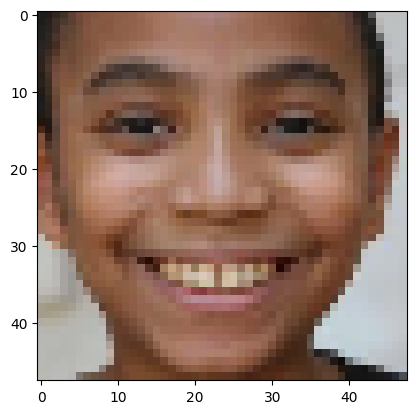

In [7]:
plt.imshow(images[87])

In [8]:
print(ages[87])

10


In [9]:
print(genders[87])

0


In [10]:
images_f=np.array(images)
ages_f=np.array(ages)
genders_f=np.array(genders)

In [11]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'ages.npy',ages_f)
np.save(fldr+'genders.npy',genders_f)

In [12]:
values, counts=np.unique(genders_f,return_counts=True)
print(counts)

[12391 11317]


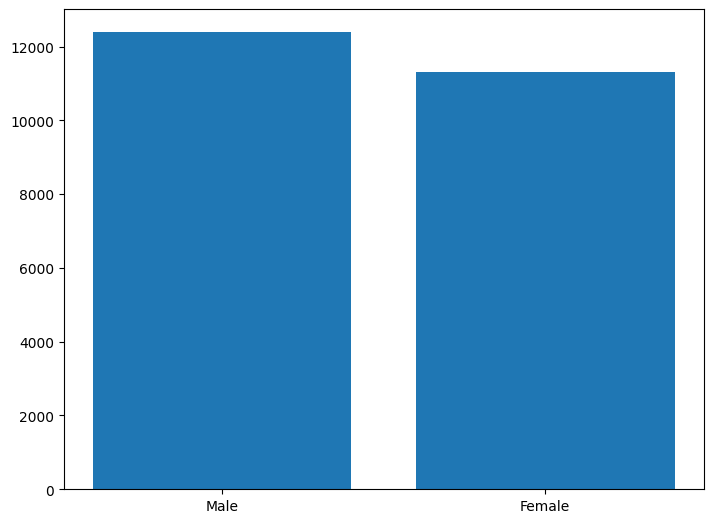

In [13]:
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
gender=['Male','Female']
values=[12391,11317]
ax.bar(gender,values)
plt.show()

In [14]:
values, counts=np.unique(ages_f,return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  293  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [15]:
val=values.tolist()
cnt=counts.tolist()

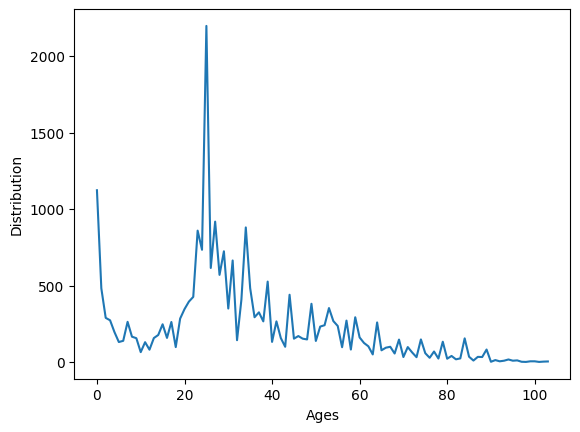

In [16]:
plt.plot(counts)
plt.xlabel('Ages')
plt.ylabel('Distribution')
plt.show()

In [17]:
labels=[]
i=0
while i<len(ages):
    label=[]
    label.append(ages[i])
    label.append(genders[i])
    labels.append(label)
    i=i+1

In [18]:
images_f_2=images_f/255

In [19]:
images_f_2.shape

(23708, 48, 48, 3)

In [20]:
labels_f=np.array(labels)

In [21]:
import sklearn

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(images_f_2,labels_f,test_size=0.25)

In [24]:
Y_train[0:5]

array([[30,  0],
       [24,  1],
       [ 1,  1],
       [26,  0],
       [26,  1]])

In [25]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [26]:
Y_train_2[0][0:5]

array([0, 1, 1, 0, 1])

In [27]:
Y_train_2[1][0:5]

array([30, 24,  1, 26, 26])

In [28]:
def Convolution(input_tensor,filters):
    x=Conv2D(filters=filters,kernel_size=(3,3),padding="same",strides=(1,1),kernel_regularizer=l2(0.001))(input_tensor)
    x=Dropout(0.1)(x)
    x=Activation('relu')(x)
    return x

In [2]:
def model(input_shape):
    inputs=Input((input_shape))
    conv_1=Convolution(inputs,32)
    maxp_1=MaxPooling2D(pool_size=(2,2))(conv_1)
    conv_2=Convolution(maxp_1,64)
    maxp_2=MaxPooling2D(pool_size=(2,2))(conv_2)
    conv_3=Convolution(maxp_2,128)
    maxp_3=MaxPooling2D(pool_size=(2,2))(conv_3)
    conv_4=Convolution(maxp_3,256)
    maxp_4=MaxPooling2D(pool_size=(2,2))(conv_4)
    flatten=Flatten()(maxp_4)
    dense_1=Dense(64,activation='relu')(flatten)
    dense_2=Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1=Dense(1,activation='sigmoid',name='sex_out')(drop_1)
    output_2=Dense(1,activation='relu',name='age_out')(drop_2)
    model=Model(inputs=[inputs],outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"],optimizer="Adam",metrics=["accuracy"])
    return model

In [3]:
Model=model((48,48,3))

NameError: name 'Input' is not defined

In [31]:
Model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 conv2d (Conv2D)                (None, 48, 48, 32)   896         ['input_1[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 48, 48, 32)   0           ['conv2d[0][0]']                 
                                                                                                  
 activation (Activation)        (None, 48, 48, 32)   0           ['dropout[0][0]']                
                                                                                              

In [32]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [33]:
fle_s='Age_Sex_Detection.h5'
checkpoint=ModelCheckpoint(fle_s,monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False,mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75,monitor='val_loss',restore_best_weights='True')
callback_list=[checkpoint,Early_stop]

In [34]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=250,callbacks=callback_list)

Epoch 1/250
278/278 [==============================] - ETA: 0s - loss: 16.6990 - sex_out_loss: 0.7037 - age_out_loss: 15.8184 - sex_out_accuracy: 0.5378 - age_out_accuracy: 0.0471
Epoch 1: val_loss improved from inf to 16.33784, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 80s 278ms/step - loss: 16.6990 - sex_out_loss: 0.7037 - age_out_loss: 15.8184 - sex_out_accuracy: 0.5378 - age_out_accuracy: 0.0471 - val_loss: 16.3378 - val_sex_out_loss: 0.6842 - val_age_out_loss: 15.4977 - val_sex_out_accuracy: 0.6130 - val_age_out_accuracy: 0.0476
Epoch 2/250
278/278 [==============================] - ETA: 0s - loss: 13.7267 - sex_out_loss: 0.6333 - age_out_loss: 12.9078 - sex_out_accuracy: 0.6280 - age_out_accuracy: 0.0468
Epoch 2: val_loss improved from 16.33784 to 11.81823, saving model to Age_Sex_Detection.h5
278/278 [==============================] - 81s 291ms/step - loss: 13.7267 - sex_out_loss: 0.6333 - age_out_loss: 12.9078 - sex_out_accuracy: 0.6280 - a

KeyboardInterrupt: 

In [35]:
Model.evaluate(X_test,Y_test_2)

186/186 [==============================] - 6s 32ms/step - loss: 16.1626 - sex_out_loss: 0.5908 - age_out_loss: 15.3514 - sex_out_accuracy: 0.7252 - age_out_accuracy: 0.0454


[16.162588119506836,
 0.5907514691352844,
 15.351371765136719,
 0.7251560688018799,
 0.04538552463054657]

In [36]:
pred=Model.predict(X_test)

186/186 [==============================] - 7s 36ms/step


In [37]:
pred[1]

array([[17.593609],
       [27.674616],
       [17.745792],
       ...,
       [38.096012],
       [ 3.886044],
       [28.158697]], dtype=float32)

In [42]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model Loss')
plt.xlabel=('Epoch')
plt.ylabel=('Loss')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

NameError: name 'History' is not defined

In [43]:
plt.plot(History.history['sex_out_accuracy'])
plt.plot(History.history['val_sex_out_accuracy'])
plt.title('Model Accuracy')
plt.xlabel=('Epoch')
plt.ylabel=('Accuracy')
plt.legend(['Train','Validation'],loc='upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right=0.95,left=0,hspace=0.25,wspace=0.35)

NameError: name 'History' is not defined

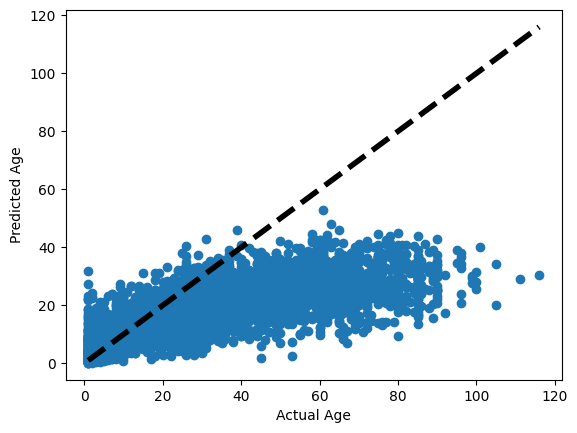

In [44]:
fig,ax=plt.subplots()
ax.scatter(Y_test_2[1],pred[1])
ax.plot([Y_test_2[1].min(),Y_test_2[1].max()],[Y_test_2[1].min(),Y_test_2[1].max()],'k--',lw=4)
ax.set_xlabel('Actual Age')
ax.set_ylabel('Predicted Age')
plt.show()

In [45]:
i=0
Pred_l=[]
while(i<len(pred[0])):
    Pred_l.append(int(np.round(pred[0][i])))
    i=i+1

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [47]:
report=classification_report(Y_test_2[0],Pred_l)

In [48]:
print(report)

              precision    recall  f1-score   support

           0       0.80      0.63      0.70      3064
           1       0.68      0.83      0.74      2863

    accuracy                           0.73      5927
   macro avg       0.74      0.73      0.72      5927
weighted avg       0.74      0.73      0.72      5927



In [49]:
results=confusion_matrix(Y_test_2[0],Pred_l)

<AxesSubplot:>

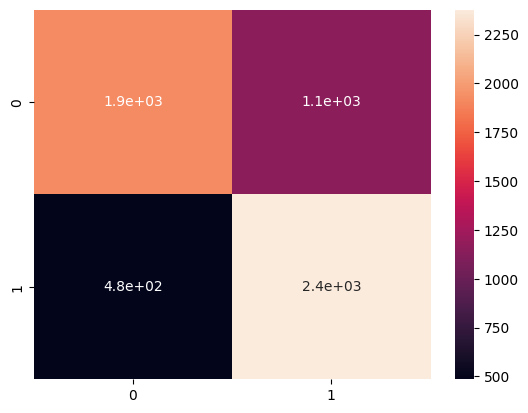

In [50]:
import seaborn as sns
sns.heatmap(results,annot=True)

In [52]:
def test_image(ind,images_f,images_f_2,Model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_l=Model.predict(np.array([image_test]))
    sex_f=['Male','Female']
    age=int(np.round(pred_l[1][0]))
    sex=int(np.round(pred_l[0][0]))
    print("Predicted Age is "+ str(age))
    print("Predicted Gender is "+ sex_f[sex])

1/1 [==============================] - 0s 25ms/step
Predicted Age is 34
Predicted Gender is Male


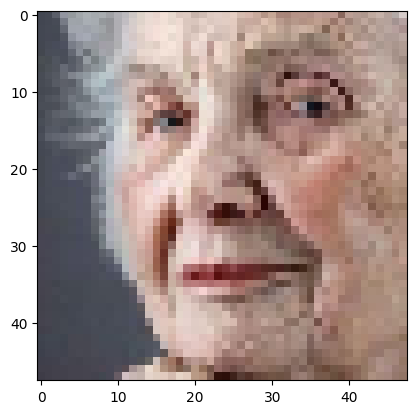

In [53]:
test_image(4,images_f,images_f_2,Model)

1/1 [==============================] - 0s 34ms/step
Predicted Age is 17
Predicted Gender is Female


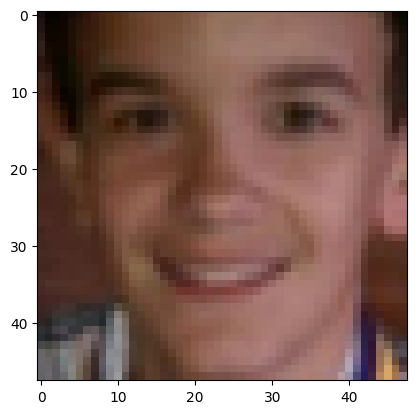

In [54]:
test_image(23,images_f,images_f_2,Model)

1/1 [==============================] - 0s 23ms/step
Predicted Age is 15
Predicted Gender is Female


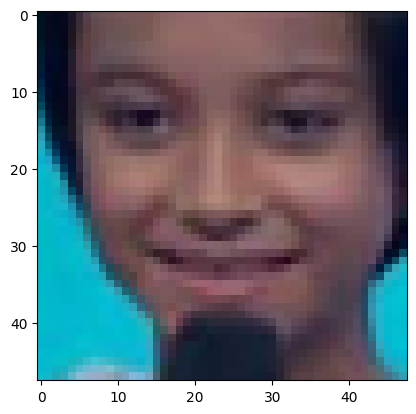

In [55]:
test_image(168,images_f,images_f_2,Model)

1/1 [==============================] - 0s 38ms/step
Predicted Age is 22
Predicted Gender is Female


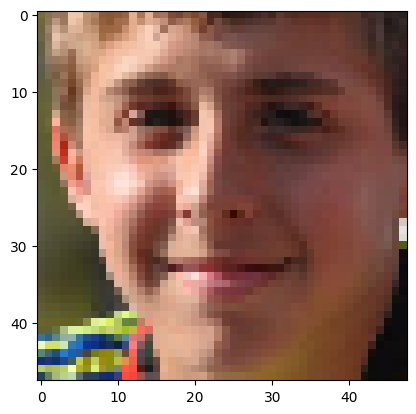

In [56]:
test_image(888,images_f,images_f_2,Model)

1/1 [==============================] - 0s 22ms/step
Predicted Age is 15
Predicted Gender is Female


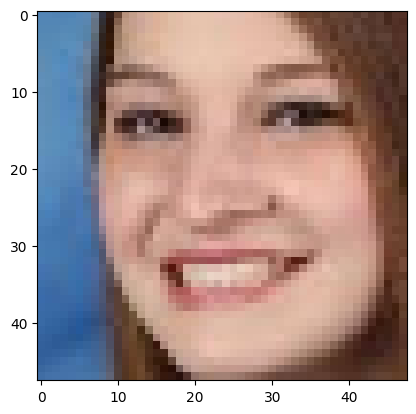

In [57]:
test_image(1288,images_f,images_f_2,Model)